# Intermolecular Potential Energy Surfaces

## Definitions
**Potential Energy Surface**: the energy of a system or collection of atoms, in terms of certain parameters, normally the positions of the atoms. [reference](https://chem.libretexts.org/Courses/University_of_California_Davis/UCD_Chem_107B%3A_Physical_Chemistry_for_Life_Scientists/Chapters/2%3A_Chemical_Kinetics/2.06%3A_Potential_Energy_Surfaces).

## Goals
In this exercise we will scan the intermolecular potential energy surfaces of a pair of molecules (dimer): the water dimer.

## Loading required modules and functions

In [1]:
import psi4
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Specifying water dimer geometry
Here you will setup your the potential energy surface scans. The first step is to create your molecule using what is called a z-matrix specification. In this type of geometry specification, you specify the geometry of a molecule through connectivity, that is, by listing each atom and defining its connectivity to other atoms.

In [2]:
# set the amount of memory that you will need
psi4.set_memory('500 MB')

# set the molecule name for your files and plots
molecule_name = "h2o-dimer"

# Define water dimer
water_dimer = """
O1
H2 1 1.0
H3 1 1.0 2 104.52
x4 2 1.0 1 90.0 3 180.0
--
O5 2 **R** 4 90.0 1 180.0
H6 5 1.0 2 120.0 4 90.0
H7 5 1.0 2 120.0 4 -90.0
"""

## Scan 1D PES
Now we will perform a one-dimensional (1D) scan of the water dimer as the intermolecular distance between the two molecules is increased. The scan will be performed along the vector connecting the two oxygen atoms of the molecule.

Since the monomer geometries are not changing and since we don’t care about the absolute energy, we will be computing the interaction energy. For a dimer the interaction energy is calculated by subtracting the energy of the monomers from the energy of the dimer. This is done automatically by using the command `bsse_type='cp'`.

In [3]:
rvals = [1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 3.0, 3.5]
energies = []
for r in rvals:
    # Build a new molecule at each separation
    mol = psi4.geometry(water_dimer.replace('**R**', str(r)))

    # Compute the interaction energy
    E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')

    # Place in a reasonable unit, kcal/mole in this case
    E = E*627.509

    # Append the value to our list
    energies.append(E)

print("Finished computing the potential energy surface!")

Finished computing the potential energy surface!


## Exercise
Plot the energies vs. separation of the two oxygen atoms (R).

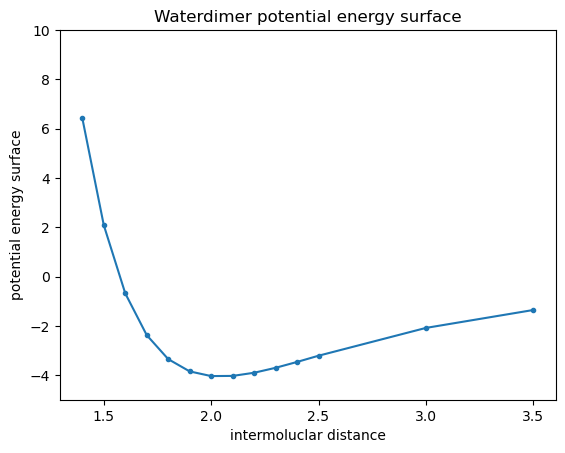

In [4]:
plt.plot(rvals,energies,".-"); # look at rvals and energies
# give it an xlabel
plt.xlabel("intermoluclar distance")
# give it a ylabel
plt.ylabel("potential energy surface")
plt.ylim(-5, 10)
# give it a title
plt.title('Waterdimer potential energy surface')

plt.show()

## Scan 2D PES
Now let’s get even more detailed! Instead of simply scanning the PES along a single coordinate, let’s consider two coordinates at the same time. For this, we will choose to look at (1) the distance between the two molecules, and (2) a rotation of one of the molecules about the distance vector.

To do this, the first thing we need to do is redefine our z-matrix to define the angle we want to change. To maintain the water molecule as planar, we need to adjust two dihedral angles, such that one angle is always 180 from the other. We will define one of these dihedral angles as A and the other as B.

In [5]:
# Define water dimer
water_dimer2 = """
O1
H2 1 1.0
H3 1 1.0 2 104.52
x4 2 1.0 1 90.0 3 180.0
--
O5 2 **R** 4 90.0 1 180.0
H6 5 1.0 2 120.0 4 **A**
H7 5 1.0 2 120.0 4 **B**
"""

First, let’s choose one value of R and rotate through many dihedral angles. Since we want our water to remain planar, the two dihedral angles aren’t actually independent; they must always be 180 degrees apart. Therefore, we will choose a range of values for A, and then calculate B based on the value of A. We will create a list called `energies_R` to store our energy values for this particular value of R.

In [6]:
R = 1.8
Avals = np.linspace(start=-180,stop=180, num=25)

energies_R = []

for A in Avals:

    print(F'Computing dimer at {R:.1f} angstroms and {A:.2f} degrees')

    # Build a new molecule at each separation
    B = A-180
    molR = water_dimer2.replace('**R**', str(R))
    molA = molR.replace('**A**', str(A))
    molB = molA.replace('**B**', str(B))
    mol = psi4.geometry(molB)

    # calculate energy
    psi4.set_output_file(F'{molecule_name}_{R:.1f}_{A:.2f}_energy.dat', False)
    E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')       
    E = E*627.509
    energies_R.append(E)

Computing dimer at 1.8 angstroms and -180.00 degrees
Computing dimer at 1.8 angstroms and -165.00 degrees
Computing dimer at 1.8 angstroms and -150.00 degrees
Computing dimer at 1.8 angstroms and -135.00 degrees
Computing dimer at 1.8 angstroms and -120.00 degrees
Computing dimer at 1.8 angstroms and -105.00 degrees
Computing dimer at 1.8 angstroms and -90.00 degrees
Computing dimer at 1.8 angstroms and -75.00 degrees
Computing dimer at 1.8 angstroms and -60.00 degrees
Computing dimer at 1.8 angstroms and -45.00 degrees
Computing dimer at 1.8 angstroms and -30.00 degrees
Computing dimer at 1.8 angstroms and -15.00 degrees
Computing dimer at 1.8 angstroms and 0.00 degrees
Computing dimer at 1.8 angstroms and 15.00 degrees
Computing dimer at 1.8 angstroms and 30.00 degrees
Computing dimer at 1.8 angstroms and 45.00 degrees
Computing dimer at 1.8 angstroms and 60.00 degrees
Computing dimer at 1.8 angstroms and 75.00 degrees
Computing dimer at 1.8 angstroms and 90.00 degrees
Computing dime

## Exercise
Plot the energy as a function of the dihedral angle A.

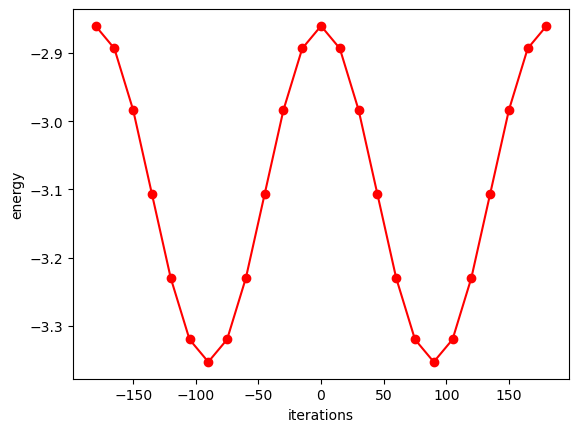

In [7]:
plt.figure()
plt.plot(Avals, energies_R, 'r-o') # look at Avals and energies_R
# give it xlabel and ylabel
plt.xlabel("iterations")
plt.ylabel("energy")

plt.show()

Now let’s expand to two degrees of freedom. We will use the same angles as before, but now instead of just doing all the calculations at a single value of R, we will do the calculation at multiple values of R. To do this, we will use a nested *for loop*. This means we will have an outer `for` loop that counts over the different values of R and then an inner `for` loop that counts over the different values of A for a particular value of R. As we calculate the energies at each angle for a particular value of R, we will save the values in a list called `energies_R` as we did before. Once we have finished all the angles for a particular R, we will append the list `energies_R` to a list called `energy_2D`. This means `energy_2D` will be a list of lists. We will need to create `energy_2D` as an empty list outside of our `for` loop.

In [8]:
Rvals = np.linspace(start=1.8,stop=2.5,num=8)
Avals = np.linspace(start=-180,stop=180, num=25)

energy_2D = []

for R in Rvals:
    energies_R = []

    for A in Avals:

        print(F'Computing dimer at {R:.1f} angstroms and {A:.2f} degrees')

        # Build a new molecule at each separation
        B = A-180
        molR = water_dimer2.replace('**R**', str(R))
        molA = molR.replace('**A**', str(A))
        molB = molA.replace('**B**', str(B))
        mol = psi4.geometry(molB)

        # calculate energy
        psi4.set_output_file(F'{molecule_name}_{R:.1f}_{A:.2f}_energy.dat', False)
        E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')       
        E = E*627.509
        energies_R.append(E)

    energy_2D.append(energies_R)

print(F'All calculations are complete!')

Computing dimer at 1.8 angstroms and -180.00 degrees
Computing dimer at 1.8 angstroms and -165.00 degrees
Computing dimer at 1.8 angstroms and -150.00 degrees
Computing dimer at 1.8 angstroms and -135.00 degrees
Computing dimer at 1.8 angstroms and -120.00 degrees
Computing dimer at 1.8 angstroms and -105.00 degrees
Computing dimer at 1.8 angstroms and -90.00 degrees
Computing dimer at 1.8 angstroms and -75.00 degrees
Computing dimer at 1.8 angstroms and -60.00 degrees
Computing dimer at 1.8 angstroms and -45.00 degrees
Computing dimer at 1.8 angstroms and -30.00 degrees
Computing dimer at 1.8 angstroms and -15.00 degrees
Computing dimer at 1.8 angstroms and 0.00 degrees
Computing dimer at 1.8 angstroms and 15.00 degrees
Computing dimer at 1.8 angstroms and 30.00 degrees
Computing dimer at 1.8 angstroms and 45.00 degrees
Computing dimer at 1.8 angstroms and 60.00 degrees
Computing dimer at 1.8 angstroms and 75.00 degrees
Computing dimer at 1.8 angstroms and 90.00 degrees
Computing dime

UnknownError: 
    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M. Richard, H. R. McAlexander, M. Saitow, X. Wang,
    P. Verma, M. H. Lechner, and A. Jiang

             Previous Authors, Complete List of Code Contributors,
                       and Citations for Specific Modules
    https://github.com/psi4/psi4/blob/master/codemeta.json
    https://github.com/psi4/psi4/graphs/contributors
    http://psicode.org/psi4manual/master/introduction.html#citing-psifour

    -----------------------------------------------------------------------


    Psi4 started on: Tuesday, 27 September 2022 06:25PM

    Process ID: 10544
    Host:       Lenovo-Y540-Zoha
    PSIDATADIR: C:\Users\64292\Anaconda3\envs\qm-tools\lib\share\psi4
    Memory:     476.8 MiB
    Threads:    1
    
  ==> Input QCSchema <==

--------------------------------------------------------------------------
{'driver': 'energy',
 'extras': {'psiapi': True, 'wfn_qcvars_only': True},
 'id': None,
 'keywords': {'function_kwargs': {}},
 'model': {'basis': 'aug-cc-pvdz', 'method': 'scf'},
 'molecule': {'atom_labels': ['1', '2', '3', '5', '6', '7'],
              'atomic_numbers': [8, 1, 1, 8, 1, 1],
              'fix_com': True,
              'fix_orientation': True,
              'fragment_charges': [0.0, 0.0],
              'fragment_multiplicities': [1, 1],
              'fragments': [[0, 1, 2], [3, 4, 5]],
              'geometry': [3.6985726236876735e-17, -0.05118338925575475, -3.3050226556771247, 3.6985726236876735e-17,
                           -0.05118338925575475, -1.4152965302192972, 3.6985726236876735e-17, 1.7781852282291912,
                           -3.7788108895950563, 3.6985726236876735e-17, -0.05118338925575475, 3.120046170879491,
                           -1.1572161902445872, 1.1060328009888312, 4.064909233608405, 1.157216190244586,
                           -1.2083995795003426, 4.064909233608404],
              'mass_numbers': [16, 1, 1, 16, 1, 1],
              'masses': [15.99491461957, 1.00782503223, 1.00782503223, 15.99491461957, 1.00782503223, 1.00782503223],
              'molecular_charge': 0.0,
              'molecular_multiplicity': 1,
              'name': 'H4O2',
              'provenance': {'creator': 'QCElemental',
                             'routine': 'qcelemental.molparse.from_string',
                             'version': 'v0.25.0'},
              'real': [True, True, True, False, False, False],
              'schema_name': 'qcschema_molecule',
              'schema_version': 2,
              'symbols': ['O', 'H', 'H', 'O', 'H', 'H'],
              'validated': True},
 'protocols': {'stdout': True},
 'provenance': {'creator': 'QCElemental', 'routine': 'qcelemental.models.results', 'version': 'v0.25.0'},
 'schema_name': 'qcschema_input',
 'schema_version': 1}
--------------------------------------------------------------------------

Scratch directory: C:\Users\64292\AppData\Local\Temp/

*** tstart() called on Lenovo-Y540-Zoha
*** at Tue Sep 27 18:48:09 2022

   => Loading Basis Set <=

    Name: AUG-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1, 4     entry O          line   254 file C:\Users\64292\Anaconda3\envs\qm-tools\lib\share\psi4\basis\aug-cc-pvdz.gbs 
    atoms 2-3, 5-6 entry H          line    40 file C:\Users\64292\Anaconda3\envs\qm-tools\lib\share\psi4\basis\aug-cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: C1

    Geometry (in Bohr), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
         O            0.000000000000    -0.051183389256    -3.305022655677    15.994914619570
         H            0.000000000000    -0.051183389256    -1.415296530219     1.007825032230
         H            0.000000000000     1.778185228229    -3.778810889595     1.007825032230
      Gh(O)           0.000000000000    -0.051183389256     3.120046170879    15.994914619570
      Gh(H)          -1.157216190245     1.106032800989     4.064909233608     1.007825032230
      Gh(H)           1.157216190245    -1.208399579500     4.064909233608     1.007825032230

  Running in c1 symmetry.

  Rotational constants: A =      7.04318  B =      0.15783  C =      0.15529 [cm^-1]
  Rotational constants: A = 211149.10952  B =   4731.69864  C =   4655.42698 [MHz]
  Nuclear repulsion =    8.801420354575152

  Charge       = 0
  Multiplicity = 1
  Electrons    = 10
  Nalpha       = 5
  Nbeta        = 5

  ==> Algorithm <==

  SCF Algorithm Type is DF.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-06
  Density threshold  = 1.00e-06
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 38
    Number of basis functions: 82
    Number of Cartesian functions: 86
    Spherical Harmonics?: true
    Max angular momentum: 2

   => Loading Basis Set <=

    Name: (AUG-CC-PVDZ AUX)
    Role: JKFIT
    Keyword: DF_BASIS_SCF
    atoms 1, 4     entry O          line   270 file C:\Users\64292\Anaconda3\envs\qm-tools\lib\share\psi4\basis\aug-cc-pvdz-jkfit.gbs 
    atoms 2-3, 5-6 entry H          line    70 file C:\Users\64292\Anaconda3\envs\qm-tools\lib\share\psi4\basis\aug-cc-pvdz-jkfit.gbs 

  ==> Integral Setup <==

  DFHelper Memory: AOs need 0.017 GiB; user supplied 0.349 GiB. Using in-core AOs.

  ==> MemDFJK: Density-Fitted J/K Matrices <==

    J tasked:                   Yes
    K tasked:                   Yes
    wK tasked:                   No
    OpenMP threads:               1
    Memory [MiB]:               357
    Algorithm:                 Core
    Schwarz Cutoff:           1E-12
    Mask sparsity (%):       0.0297
    Fitting Condition:        1E-10

   => Auxiliary Basis Set <=

  Basis Set: (AUG-CC-PVDZ AUX)
    Blend: AUG-CC-PVDZ-JKFIT
    Number of shells: 104
    Number of basis functions: 300
    Number of Cartesian functions: 342
    Spherical Harmonics?: true
    Max angular momentum: 3

  Minimum eigenvalue in the overlap matrix is 2.2486760181E-03.
  Reciprocal condition number of the overlap matrix is 3.2852486713E-04.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A         82      82 
   -------------------------
    Total      82      82
   -------------------------

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-RHF iter SAD:   -75.41487092181744   -7.54149e+01   0.00000e+00 
   @DF-RHF iter   1:   -75.94940771330965   -5.34537e-01   5.50503e-03 DIIS/ADIIS
   @DF-RHF iter   2:   -76.00128314059421   -5.18754e-02   3.77407e-03 DIIS/ADIIS
   @DF-RHF iter   3:   -76.03523296531708   -3.39498e-02   2.81177e-04 DIIS/ADIIS
   @DF-RHF iter   4:   -76.03568650145640   -4.53536e-04   6.60311e-05 DIIS
   @DF-RHF iter   5:   -76.03571664853372   -3.01471e-05   1.56264e-05 DIIS
   @DF-RHF iter   6:   -76.03571921794470   -2.56941e-06   3.09046e-06 DIIS
   @DF-RHF iter   7:   -76.03571932121322   -1.03269e-07   5.04371e-07 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A    -20.584252     2A     -1.335644     3A     -0.696508  
       4A     -0.577385     5A     -0.506085  

    Virtual:                                                              

       6A      0.024503     7A      0.048858     8A      0.058270  
       9A      0.079074    10A      0.134983    11A      0.147337  
      12A      0.178109    13A      0.190503    14A      0.216928  
      15A      0.221996    16A      0.228577    17A      0.263994  
      18A      0.317827    19A      0.354155    20A      0.366038  
      21A      0.392054    22A      0.408373    23A      0.415134  
      24A      0.423762    25A      0.458675    26A      0.475661  
      27A      0.493016    28A      0.512489    29A      0.532875  
      30A      0.570843    31A      0.609445    32A      0.647333  
      33A      0.733678    34A      0.811299    35A      0.897799  
      36A      0.944059    37A      1.018036    38A      1.104887  
      39A      1.139336    40A      1.162944    41A      1.191894  
      42A      1.203915    43A      1.272308    44A      1.292030  
      45A      1.298373    46A      1.331631    47A      1.336031  
      48A      1.416325    49A      1.489883    50A      1.530129  
      51A      1.675913    52A      1.986987    53A      1.990785  
      54A      2.056933    55A      2.083601    56A      2.320742  
      57A      2.359605    58A      2.381559    59A      2.388651  
      60A      2.402103    61A      2.431086    62A      2.618748  
      63A      2.734036    64A      2.810278    65A      2.982025  
      66A      3.376968    67A      3.673788    68A      3.700369  
      69A      3.716576    70A      3.902552    71A      3.931551  
      72A      4.026095    73A      4.248054    74A      4.871641  
      75A      4.943621    76A      5.006339    77A      5.300573  
      78A      5.326210    79A      5.575670    80A      6.271917  
      81A      6.813153    82A     33.527445  

    Final Occupation by Irrep:
              A 
    DOCC [     5 ]

  @DF-RHF Final Energy:   -76.03571932121322

   => Energetics <=

    Nuclear Repulsion Energy =              8.8014203545751517
    One-Electron Energy =                -122.2745101960693432
    Two-Electron Energy =                  37.4373705202809646
    Total Energy =                        -76.0357193212132216

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000588            0.0000000           -0.0000588
 Dipole Y            :         -0.6852673            1.3175347            0.6322674
 Dipole Z            :         32.1236103          -31.6342887            0.4893217
 Magnitude           :                                                    0.7994984

 ------------------------------------------------------------------------------------

*** tstop() called on Lenovo-Y540-Zoha at Tue Sep 27 18:48:10 2022
Module time:
	user time   =        nan seconds =        nan minutes
	system time =        nan seconds =        nan minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =        nan seconds =        nan minutes
	system time =        nan seconds =        nan minutes
	total time  =       1309 seconds =      21.82 minutes

    Psi4 stopped on: Tuesday, 27 September 2022 06:48PMTraceback (most recent call last):
  File "C:\Users\64292\Anaconda3\envs\qm-tools\lib\site-packages\psi4\driver\schema_wrapper.py", line 459, in run_qcschema
    exit_printing(start_time=start_time, success=True)
  File "C:\Users\64292\Anaconda3\envs\qm-tools\lib\site-packages\psi4\extras.py", line 81, in exit_printing
    run_time = run_time[0] + '.' + run_time[1][:2]
IndexError: list index out of range


## Exercise
Plot the interaction energies as a function of angle for two different values of R, 2.0 and 2.3, on the same graph.

In the Rvals list, 2.0 angstrom is index 2, Rvals[2]. 2.3 angstroms is index 5, Rvals[5].

In [ ]:
plt.figure()
plt.plot(Avals[2], energy_2D[2], 'r-o', label='R=2.0')
plt.plot(Avals[5], energy_2D[5], 'b-o', label='R=2.3')
# put in an x and ylabel
plt.xlabel("iterations")
plt.ylabel("energy")
plt.legend()
plt.show()

## Making 3D plots
Comparing the two graphs you just made, it is clear that the interaction energy is a function of both the seperation between the molecules and the rotation angle. We can capture this in a 3D plot using some of matplotlib’s advanced features.

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline

X, Y = np.meshgrid(Avals, Rvals)

mycmap1 = plt.get_cmap('gist_earth')

fig, (ax,ax2) = plt.subplots(1,2,figsize=(12,6))

ax = plt.axes(projection='3d')
cf = ax.contour3D(X, Y, np.array(nrg_2D), 300, cmap=mycmap1)
ax.plot_surface(X, Y, np.array(nrg_2D), rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel('angle (degrees)')
ax.set_ylabel('R (Bohr)')
ax.set_zlabel('energy (kcal/mol)')
#ax.set_zlim3d(-4,-2)
ax.view_init(45, 35)